In [2]:
!pip install numpy_financial

In [3]:
!pip install quantstats
!pip install ta
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=29cea67a455bfe27e28eed6dd340f13486f04f95a3d1eece3b352e1a9e8516bd
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [4]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats

import quantstats as qs
import ta
import yfinance as yf

import matplotlib.pyplot as plt


In [5]:
import numpy_financial as npf

# Try the Info Dictionary

In [6]:

ticker = 'BBCA.JK'
yf.Ticker(ticker).info


{'address1': 'Menara BCA Grand Indonesia',
 'address2': 'Jl. M.H. Thamrin No. 1',
 'city': 'Jakarta',
 'zip': '10310',
 'country': 'Indonesia',
 'phone': '62 21 2358 8000',
 'fax': '62 21 2358 8300',
 'website': 'https://www.bca.co.id',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'PT Bank Central Asia Tbk, together with its subsidiaries, provides banking products and services to individual, corporate, and small and medium enterprise customers in Indonesia and internationally. It offers savings accounts; motorcycle financing and vehicle, housing, and personal loans; mutual funds and bonds; insurance, including property, life, accident, auto, health, education, retirement, travel, and heritage protection; electronic money services; credit cards; business collection services; and eBanking, remittance, 

In [7]:
tickers = ['BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'BBNI.JK', 'BBTN.JK']
temp = {}


for ticker in tickers:
    temp[ticker] = yf.Ticker(ticker).info

temp

{'BBCA.JK': {'address1': 'Menara BCA Grand Indonesia',
  'address2': 'Jl. M.H. Thamrin No. 1',
  'city': 'Jakarta',
  'zip': '10310',
  'country': 'Indonesia',
  'phone': '62 21 2358 8000',
  'fax': '62 21 2358 8300',
  'website': 'https://www.bca.co.id',
  'industry': 'Banks - Regional',
  'industryKey': 'banks-regional',
  'industryDisp': 'Banks - Regional',
  'sector': 'Financial Services',
  'sectorKey': 'financial-services',
  'sectorDisp': 'Financial Services',
  'longBusinessSummary': 'PT Bank Central Asia Tbk, together with its subsidiaries, provides banking products and services to individual, corporate, and small and medium enterprise customers in Indonesia and internationally. It offers savings accounts; motorcycle financing and vehicle, housing, and personal loans; mutual funds and bonds; insurance, including property, life, accident, auto, health, education, retirement, travel, and heritage protection; electronic money services; credit cards; business collection services; 

In [ ]:
df = pd.DataFrame(temp).transpose()

df.head()

,address1,address2,city,zip,country,phone,fax,website,industry,industryKey,...,returnOnAssets,returnOnEquity,operatingCashflow,earningsGrowth,revenueGrowth,operatingMargins,financialCurrency,trailingPegRatio,trailingAnnualDividendRate,trailingAnnualDividendYield
BBCA.JK,Menara BCA Grand Indonesia,Jl. M.H. Thamrin No. 1,Jakarta,10310,Indonesia,62 21 2358 8000,62 21 2358 8300,https://www.bca.co.id,Banks - Regional,banks-regional,...,0.03574,0.20986,-5488170237952,0.043,0.074,0.59767,IDR,None,NaN,NaN
BBRI.JK,BRI Building,Jl. Jenderal Sudirman Kav.44-46,Jakarta,10210,Indonesia,62 21 251 0244,62 21 250 0077,https://bri.co.id,Banks - Regional,banks-regional,...,0.03155,0.19496,-58039973445632,0.352,0.041,0.42594,IDR,None,319.0,0.05104
BMRI.JK,Plaza Mandiri,Jl. Jenderal Gatot Subroto Kav. 36-38,Jakarta,12190,Indonesia,62 21 526 5045,62 21 527 4477,https://bankmandiri.co.id,Banks - Regional,banks-regional,...,0.02882,0.22252,-155565342851072,0.52,0.187,0.58748,IDR,None,353.958,0.049332
BBNI.JK,Gedung Grha BNI,Jl. Jenderal Sudirman Kav. 1,Jakarta Pusat,10220,Indonesia,62 21 251 1946,62 21 251 1961,https://www.bni.co.id,Banks - Regional,banks-regional,...,0.01994,0.14313,-27717921669120,0.12,-0.03,0.36615,IDR,None,NaN,NaN
BBTN.JK,BTN Tower,Jl. Gajah Mada No. 1,Jakarta,10130,Indonesia,62 21 633 6789,62 21 633 6719,https://www.btn.co.id,Banks - Regional,banks-regional,...,0.00833,0.12417,-18721898758144,0.167,0.464,0.51655,IDR,None,NaN,NaN


In [ ]:
df.isnull().sum()

address1                       0
address2                       0
city                           0
zip                            0
country                        0
                              ..
operatingMargins               0
financialCurrency              0
trailingPegRatio               5
trailingAnnualDividendRate     3
trailingAnnualDividendYield    3
Length: 108, dtype: int64

# Fetch all the infos for all the Tickers

Load the tickers

In [ ]:
tickers = pd.read_csv('ticker_symbols.csv')['Ticker']

tickers

0      AALI.JK
1      ABBA.JK
2      ABDA.JK
3      ABMM.JK
4      ACES.JK
        ...   
916    ZATA.JK
917    ZBRA.JK
918    ZINC.JK
919    ZONE.JK
920    ZYRX.JK
Name: Ticker, Length: 921, dtype: object

In [ ]:
info = {}
for ticker in tickers:
    info[ticker] = yf.Ticker(ticker).info

df = pd.DataFrame(info).transpose()
df.head()

,address1,address2,city,zip,country,phone,fax,website,industry,industryKey,...,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,lastSplitFactor,lastSplitDate,trailingAnnualDividendRate,trailingAnnualDividendYield,compensationAsOfEpochDate,grossProfits
AALI.JK,Jl Puloayang Raya,Blok OR-1 Kawasan Industri Pulogadung,Jakarta,13930,Indonesia,62 21 461 6555,62 21 461 6685,https://www.astra-agro.co.id,Farm Products,farm-products,...,0.14499,0.08036,IDR,None,NaN,NaN,NaN,NaN,NaN,NaN
ABBA.JK,Sahid Office Boutique,Blok G Jl. Jend Sudirman Kav. 86,Jakarta,10220,Indonesia,62 21 573 9203,62 21 573 9210,https://www.mahakax.com,Publishing,publishing,...,-0.11814,-0.1361,IDR,None,NaN,NaN,NaN,NaN,NaN,NaN
ABDA.JK,Plaza Asia,27th Floor Jalan Jenderal Sudirman Kav. 59,Jakarta,12190,Indonesia,62 21 5140 1688,62 21 5140 1697,https://www.abdainsurance.co.id,Insurance - Property & Casualty,insurance-property-casualty,...,0.10262,0.05221,IDR,None,13:10,1058832000,NaN,NaN,NaN,NaN
ABMM.JK,Tiara Marga Trakindo I building,"18th Floor, Suite 1802 Jl. Cilandak KKO No. 1",Jakarta Selatan,12560,Indonesia,62 21 2997 6767,62 21 2997 6768,https://www.abm-investama.com,Thermal Coal,thermal-coal,...,0.3073,0.19939,USD,None,NaN,NaN,400.0,0.103627,NaN,NaN
ACES.JK,Kawan Lama Building,5th floor Jl. Puri Kencana No. 1 Puri-Kembangan,Jakarta,11610,Indonesia,62 21 582 2222,62 21 582 4022,https://www.acehardware.co.id,Specialty Retail,specialty-retail,...,0.15849,0.12333,IDR,None,10:1,1351728000,31.06,0.034132,NaN,NaN


In [ ]:
df.isna().sum()

address1                        47
address2                       111
city                            47
zip                             94
country                         47
                              ... 
lastSplitDate                  686
trailingAnnualDividendRate     736
trailingAnnualDividendYield    736
compensationAsOfEpochDate      906
grossProfits                   892
Length: 118, dtype: int64

In [8]:
filename = 'stock_info.csv'
df.to_csv(filename)

NameError: name 'df' is not defined

# Exploratory Data Analysis
Includes elementary preprocessing

In [10]:
#Run this code to load the data
filename = 'stock_info.csv'
df = pd.read_csv(filename)

## Remove Unrelated Columns

In [ ]:
list(df.columns)


['Unnamed: 0',
 'address1',
 'address2',
 'city',
 'zip',
 'country',
 'phone',
 'fax',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'dividendRate',
 'dividendYield',
 'exDividendDate',
 'payoutRatio',
 'fiveYearAvgDividendYield',
 'beta',
 'trailingPE',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'enterpriseValue',
 'profitMargins',
 'floatShares',
 'sharesOutstanding',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'impliedSharesOutstanding',
 'bookValu

In [11]:
drop_cols = ['address1', 'address2', 'city','zip','country', 'phone', 'fax', 'longName', 'website', 'industry', 'shortName', 'underlyingSymbol', 'timeZoneShortName',
             'timeZoneFullName', 'exchange', 'sectorDisp', 'sector', 'currency', 'symbol', 'messageBoardId', 'uuid', 'quoteType', 'financialCurrency', 'gmtOffSetMilliseconds']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
len(df.columns), len(drop_cols)

(95, 24)

Move the long business summary to a new Dataframe

In [12]:
bs_sum = df['longBusinessSummary']
bs = pd.DataFrame(index = df.index, data = bs_sum)
bs.head()

df.drop(columns='longBusinessSummary', inplace=True)

In [13]:
len(df.columns)

94

In [14]:
df.head()

,Unnamed: 0,industryKey,industryDisp,sectorKey,fullTimeEmployees,companyOfficers,maxAge,priceHint,previousClose,open,...,grossMargins,ebitdaMargins,operatingMargins,trailingPegRatio,lastSplitFactor,lastSplitDate,trailingAnnualDividendRate,trailingAnnualDividendYield,compensationAsOfEpochDate,grossProfits
0,AALI.JK,farm-products,Farm Products,consumer-defensive,30057.0,"[{'maxAge': 1, 'name': 'Mr. . Santosa', 'age'...",86400,2.0,6900.0,6900.0,...,0.13472,0.14499,0.08036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABBA.JK,publishing,Publishing,communication-services,442.0,"[{'maxAge': 1, 'name': 'Mr. Tubagus Farash Akb...",86400,2.0,37.0,34.0,...,0.33397,-0.11814,-0.13610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABDA.JK,insurance-property-casualty,Insurance - Property & Casualty,financial-services,434.0,"[{'maxAge': 1, 'name': 'Mr. Vincent C. Soegia...",86400,2.0,5000.0,NaN,...,0.50871,0.10262,0.05221,NaN,13:10,1.058832e+09,NaN,NaN,NaN,NaN
3,ABMM.JK,thermal-coal,Thermal Coal,energy,8731.0,"[{'maxAge': 1, 'name': 'Mr. Achmad Ananda Djaj...",86400,2.0,3860.0,3850.0,...,0.29031,0.30730,0.19939,NaN,NaN,NaN,400.00,0.103627,NaN,NaN
4,ACES.JK,specialty-retail,Specialty Retail,consumer-cyclical,13236.0,"[{'maxAge': 1, 'name': 'Mr. Prabowo Widya Kris...",86400,2.0,910.0,910.0,...,0.44563,0.15849,0.12333,NaN,10:1,1.351728e+09,31.06,0.034132,NaN,NaN


# Filter the data frame by market cap
Get the top 200 biggest market cap company

In [15]:

top200 = pd.DataFrame(df.nlargest(200, 'marketCap'))
top200.rename(columns={"Unnamed: 0":"tickers"}, inplace=True)

top200.head()

,tickers,industryKey,industryDisp,sectorKey,fullTimeEmployees,companyOfficers,maxAge,priceHint,previousClose,open,...,grossMargins,ebitdaMargins,operatingMargins,trailingPegRatio,lastSplitFactor,lastSplitDate,trailingAnnualDividendRate,trailingAnnualDividendYield,compensationAsOfEpochDate,grossProfits
91,BBCA.JK,banks-regional,Banks - Regional,financial-services,27273.0,"[{'maxAge': 1, 'name': 'Mr. Jahja Setiaatmadj...",86400,2.0,10075.0,10025.0,...,NaN,NaN,0.59767,NaN,5:1,1.634083e+09,NaN,NaN,NaN,NaN
97,BBRI.JK,banks-regional,Banks - Regional,financial-services,80165.0,"[{'maxAge': 1, 'name': 'Mr. - Sunarso', 'age'...",86400,2.0,6250.0,6100.0,...,NaN,NaN,0.42594,NaN,5:1,1.510272e+09,319.000,0.051040,NaN,NaN
157,BREN.JK,utilities-renewable,Utilities - Renewable,utilities,NaN,"[{'maxAge': 1, 'name': 'Mr. Hendra Soetjipto T...",86400,2.0,5450.0,5450.0,...,0.96936,0.80794,0.73874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,BMRI.JK,banks-regional,Banks - Regional,financial-services,38965.0,"[{'maxAge': 1, 'name': 'Mr. Darmawan Junaidi'...",86400,2.0,7175.0,7150.0,...,NaN,NaN,0.58748,NaN,2:1,1.680566e+09,353.958,0.049332,NaN,NaN
36,AMMN.JK,other-precious-metals-mining,Other Precious Metals & Mining,basic-materials,1349.0,"[{'maxAge': 1, 'name': 'Mr. Alexander Ramlie'...",86400,2.0,8600.0,8625.0,...,0.52140,0.46422,0.40347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Discounted Cash Flow Analysis

## Sample to one of the tickers

In [ ]:
#Get cashflow data from 5 years
sample = 'MAPB.JK'
stock = yf.Ticker(sample)
cash_flow = stock.cashflow.transpose()['Free Cash Flow']

cash_flow.tail(5)
cash_flow[0]

367434000000.0

[998615641018568.1, 3569491952.3451753, 6553000535580.121, -2382835902163.7036, -4102266523739.625, 28509964433830.63]


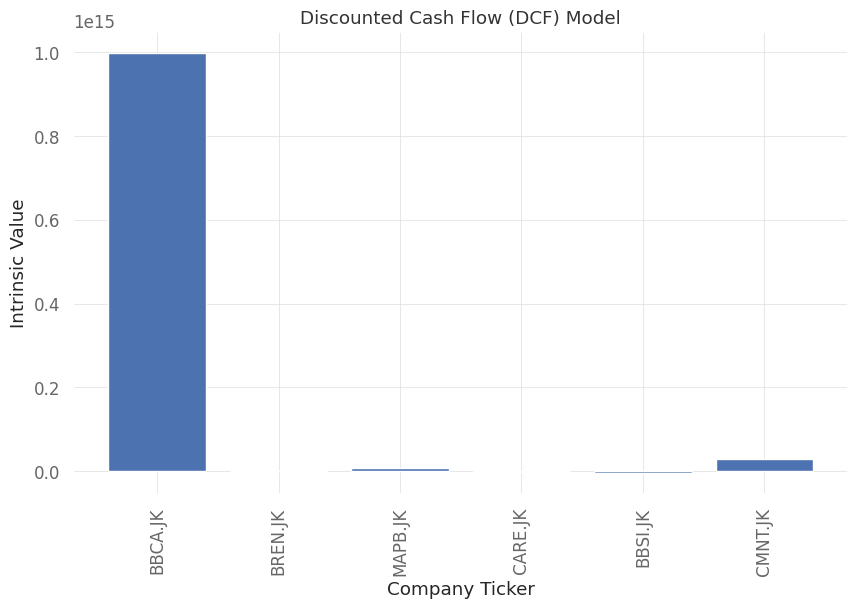

In [ ]:
sample = ['BBCA.JK', 'BREN.JK', 'MAPB.JK', 'CARE.JK', 'BBSI.JK', 'CMNT.JK']

#ASSUMPTION
# Define the required variables
discount_rate = 0.1  # Discount rate for future cash flows
terminal_growth_rate = 0.03  # Terminal growth rate for perpetuity
years = 4  # Number of years for projected cash flows

# Calculate the present value of projected cash flows
intrinsic_values = []
for ticker in sample:
    #Get cashflow data from 4 years
    stock = yf.Ticker(ticker)
    cash_flows = stock.cashflow.transpose()['Free Cash Flow'].tail(years)
    present_value = npf.npv(discount_rate, cash_flows)

    # Calculate the terminal value -- using the Gordon Growth Model (perpetuity growth model)
    last_cash_flow = cash_flows[0]
    terminal_value = last_cash_flow * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

    intrinsic_values.append(present_value + terminal_value)


print(intrinsic_values)
# Plot the intrinsic values
plt.figure(figsize=(10, 6))
plt.bar(sample, intrinsic_values)
plt.xlabel('Company Ticker')
plt.ylabel('Intrinsic Value')
plt.title('Discounted Cash Flow (DCF) Model')
plt.xticks(rotation=90)
plt.show()


## Approach 2
Try another approach

In [16]:
sample = 'BNGA.JK'

#ASSUMPTIONS
required_rate = 0.07
perpetual_rate = 0.02
cashflow_growth_rate = 0.03
years = 4

#BMRI intrinsic value calculation
stock = yf.Ticker(sample)

freecashflows = stock.cashflow.transpose()['Free Cash Flow'].tail(years)
outstanding_shares = stock.info['sharesOutstanding']

future_free_cashflows = []
discount_factor = []
discounted_future_free_cashflow = []

terminal_value = freecashflows[0] * (1*perpetual_rate)/(required_rate - perpetual_rate)

for year in range(1, years+1):
  cashflow = freecashflows[0] * (1+ cashflow_growth_rate)**year
  future_free_cashflows.append(cashflow)
  discount_factor.append((1+required_rate)**year)


for i in range(years):
  discounted_future_free_cashflow.append(future_free_cashflows[i]/discount_factor[i])



discounted_terminal_value = terminal_value/(1+required_rate)**years
discounted_future_free_cashflow.append(discounted_terminal_value)

todays_value = sum(discounted_future_free_cashflow)
fair_value = round(todays_value/outstanding_shares, 2)

print(freecashflows)
print(outstanding_shares)
print(discount_factor)
print(future_free_cashflows)
print(discounted_future_free_cashflow)
print(top200.loc[top200['tickers'] == sample]['open'])

print(f"The fair value of {sample} ", fair_value)



2023-12-31    -2500285000000.0
2022-12-31   -17173340000000.0
2021-12-31    29023213000000.0
2020-12-31    27673231000000.0
Name: Free Cash Flow, dtype: object
71286896
[1.07, 1.1449, 1.225043, 1.3107960100000002]
[-2575293550000.0, -2652552356500.0, -2732128927195.0, -2814092795010.8506]
[-2406816401869.1587, -2316841956939.4707, -2230231042661.3594, -2146857919571.2153, -762982182101.6985]
145    2200.0
Name: open, dtype: float64
The fair value of BNGA.JK  -138366.66


## Pipeline to a function

In [ ]:
def compute_dpv(discount_rate, terminal_growth_rate, years, ticker):

    #Get cashflow data from 4 years
    stock = yf.Ticker(ticker)
    cash_flows = stock.cashflow.transpose()['Free Cash Flow'].tail(years)
    present_value = npf.npv(discount_rate, cash_flows)

    # Calculate the terminal value -- using the Gordon Growth Model (perpetuity growth model)
    last_cash_flow = cash_flows[0]
    terminal_value = last_cash_flow * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

    intrinsic_values = present_value + terminal_value

    return intrinsic_values


In [ ]:
#ASSUMPTION
# Define the required variables
discount_rate = 0.1  # Discount rate for future cash flows
terminal_growth_rate = 0.03  # Terminal growth rate for perpetuity
years = 4  # Number of years for projected cash flows

# Coba function
hasil = compute_dpv(discount_rate, terminal_growth_rate, years, 'BBCA.JK')
hasil

998615641018568.1

In [17]:
def compute_dpv_approach2(required_rate, perpetual_rate, cashflow_growth_rate, years, ticker):
    stock = yf.Ticker(ticker)

    freecashflows = stock.cashflow.transpose()['Free Cash Flow'].tail(years)
    outstanding_shares = stock.info['sharesOutstanding']

    future_free_cashflows = []
    discount_factor = []
    discounted_future_free_cashflow = []

    terminal_value = freecashflows[0] * (1*perpetual_rate)/(required_rate - perpetual_rate)

    for year in range(1, years+1):
      cashflow = freecashflows[0] * (1+ cashflow_growth_rate)**year
      future_free_cashflows.append(cashflow)
      discount_factor.append((1+required_rate)**year)


    for i in range(years):
      discounted_future_free_cashflow.append(future_free_cashflows[i]/discount_factor[i])



    discounted_terminal_value = terminal_value/(1+required_rate)**years
    discounted_future_free_cashflow.append(discounted_terminal_value)

    todays_value = sum(discounted_future_free_cashflow)
    fair_value = round(todays_value/outstanding_shares, 2)

    return fair_value


In [18]:
#ASSUMPTIONS
required_rate = 0.07
perpetual_rate = 0.02
cashflow_growth_rate = 0.03
years = 4

hasil = compute_dpv_approach2(required_rate, perpetual_rate, cashflow_growth_rate, years, 'BBNI.JK')
print(hasil)

54795.84


In [19]:
#Apply for all the top 200 tickers

dpv_list = []

for ticker in top200['tickers']:
    try:
        result = compute_dpv_approach2(required_rate, perpetual_rate, cashflow_growth_rate, years, ticker)
        dpv_list.append(result)
    except Exception as e:  # Catch any exception
        print(f"Error occurred for ticker {ticker}: {e}")
        dpv_list.append(None)  # Append None to indicate failure



Error occurred for ticker ALII.JK: 'sharesOutstanding'


In [ ]:
len(dpv_list)

200

In [20]:
dpv = pd.DataFrame({'tickers':top200['tickers'], 'open_value': top200['open'], 'fair_value': dpv_list })

dpv.head()
dpv['margin'] = dpv['fair_value'] - dpv['open_value']

In [22]:
largest_margin_dpv = dpv.nlargest(10, 'margin')

In [23]:
filename = 'dpvtop10.csv'
largest_margin_dpv.to_csv(filename)

# Filter the top 200 tickers based on book value


In [26]:
df['bookValue']

0      11438.758
1         16.324
2       2382.333
3          0.255
4        341.343
         ...    
916       60.757
917      463.989
918       30.760
919      430.027
920      217.137
Name: bookValue, Length: 921, dtype: float64

In [37]:
top200bv = df.nlargest(200, 'bookValue').rename(columns={'Unnamed: 0': 'tickers'})[['tickers','open', 'bookValue']]

top200bv['margin'] = top200bv['bookValue'] - top200bv['open']


In [42]:
top200bv.sort_values(by='margin', ascending=False, inplace=True)

In [41]:
'BBNI.JK' in top200bv['tickers']

False

In [44]:
filename = 'bvtop200.csv'
top200bv.to_csv(filename)